# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
data = pd.read_csv('orange_small_churn_data.txt', sep=',')
labels = pd.read_csv('orange_small_churn_labels.txt', header=None)

2\. Рассчитайте доли классов `отток` и `не отток`.

In [48]:
counts = pd.value_counts(labels[0])
print "отток: ", str(100.*counts[1]/(counts[1]+counts[-1])) + "%"
print "не отток: ", str(100.*counts[-1]/(counts[1]+counts[-1])) + "%"

отток:  7.44%
не отток:  92.56%


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [5]:
# 191-230 признаки обфусцированны и являются категориальными.
numeric_data = data.iloc[:,:190]   
numeric_data['labels'] = labels
categorical_data = data.iloc[:,190:]   
categorical_data['labels'] = labels

In [6]:
temp = numeric_data[['Var'+str(180),'labels']].dropna()

In [7]:
# корреляция считается по формуле mean(feature(1))-mean(feature(-1)), 
# данная формула не учитывает масштаб признака, но интерпретируется лучше, чем корреляция Пирсона

def corrWithBin(df, name_feature, temp):
    values = temp.iloc[:,0]
    labels = temp.iloc[:,1]
    cor = 0
    mean_val_true = np.mean(values[labels == 1])
    mean_val_false = np.mean(values[labels == -1])
    count_val_true = len(values[labels==1])
    count_val_false = len(values[labels==-1])
    
    #считаем корреляцию только для признаков, в которых положительных классов больше 200
    if (mean_val_true == 0) | (mean_val_false==0) | (len(values[labels == 1])<200):
        corr = 0
    else:
        corr = abs(mean_val_true) - abs(mean_val_false)
        df.loc[len(correlations)] = [name_feature, abs(corr), count_val_true, count_val_false]
    return df

In [8]:
correlations = pd.DataFrame(columns = ['feature', 'corr', 'count 1', 'count -1'])
for i in range(len(numeric_data.loc[0,:])-1):       
    temp = numeric_data[['Var'+str(i+1),'labels']].dropna()
    correlations = corrWithBin(correlations,'Var'+ str(i+1), temp)

In [30]:
correlations = correlations.dropna()
correlations.sort_values(['corr'], ascending=False, inplace=True)
correlations.head()

feature           corr count 1 count -1
24  Var113  162842.184538    2976    37024
36  Var153  151453.351963    2789    33195
9    Var38   77671.003559    2789    33195
16   Var76   56780.681291    2789    33195
35  Var149   29536.673807    2575    31609

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

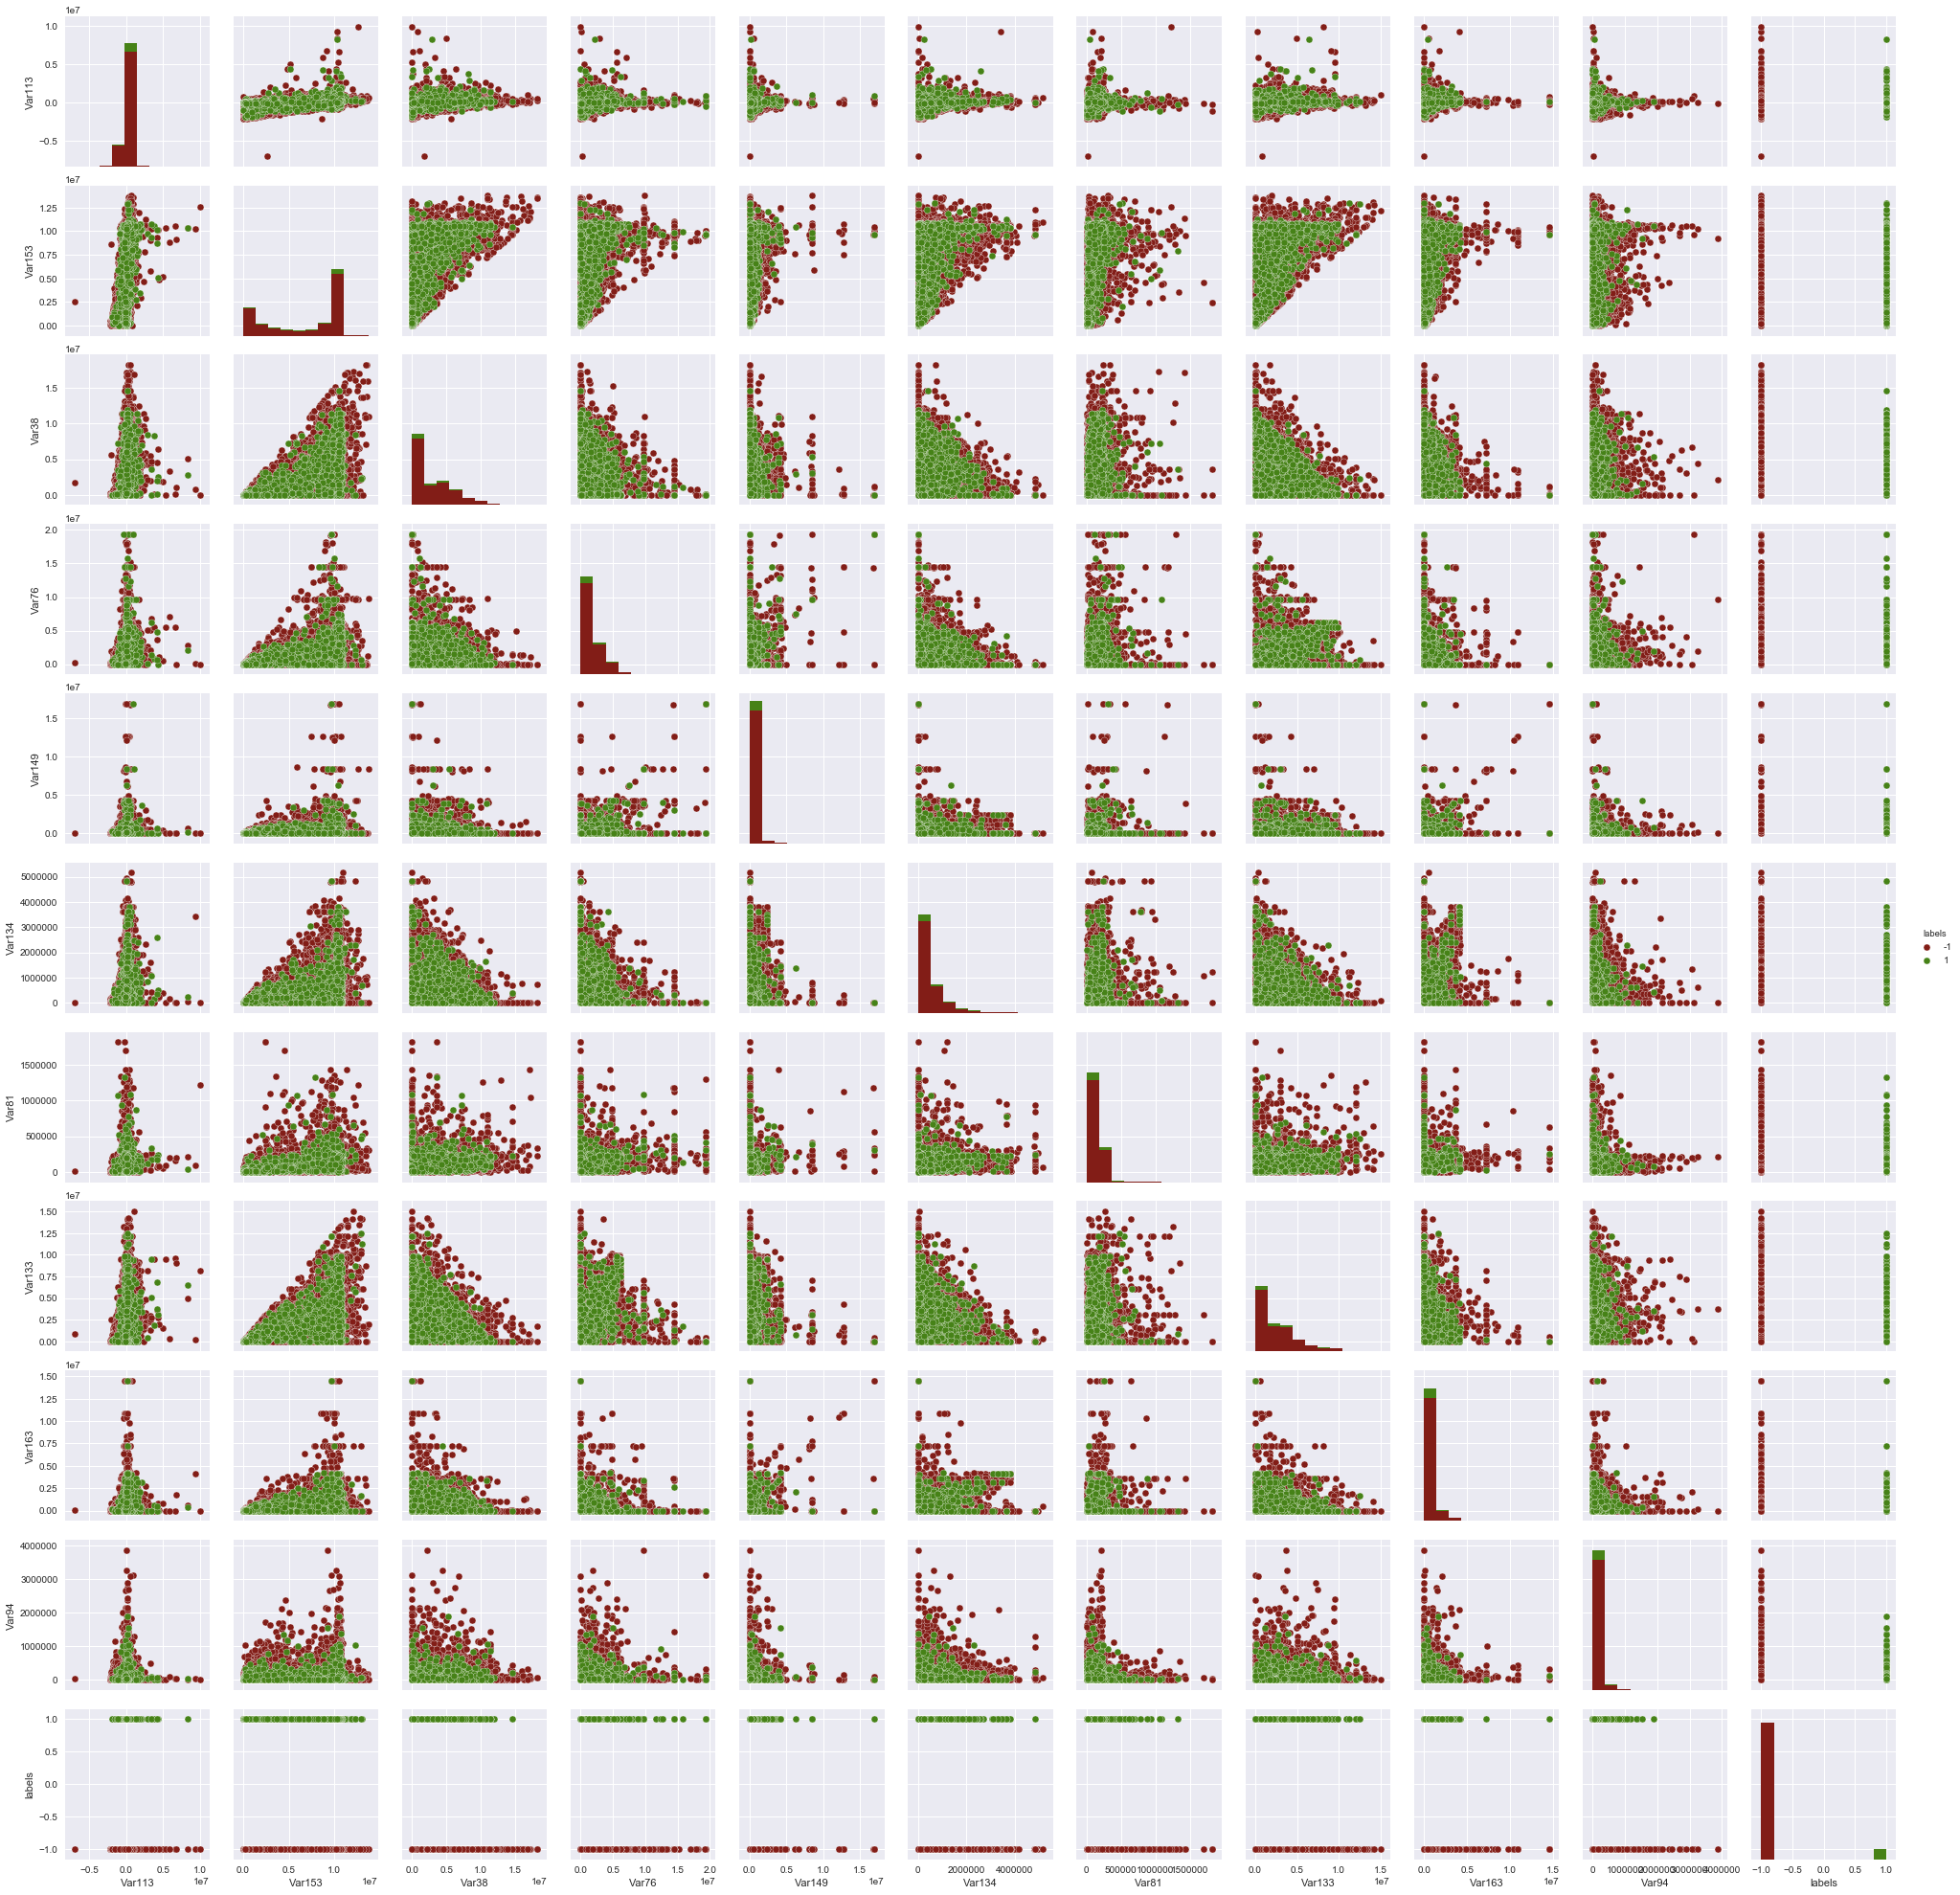

In [10]:
# рассматривал по 10 переменных, больше не выдерживает ноут
columns = correlations.feature.iloc[:10]
columns[len(columns)] = ("labels")
sns_plot = sns.pairplot(numeric_data[columns].dropna(), hue="labels",palette = sns.hls_palette(4, l=.3, s=.7))

C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


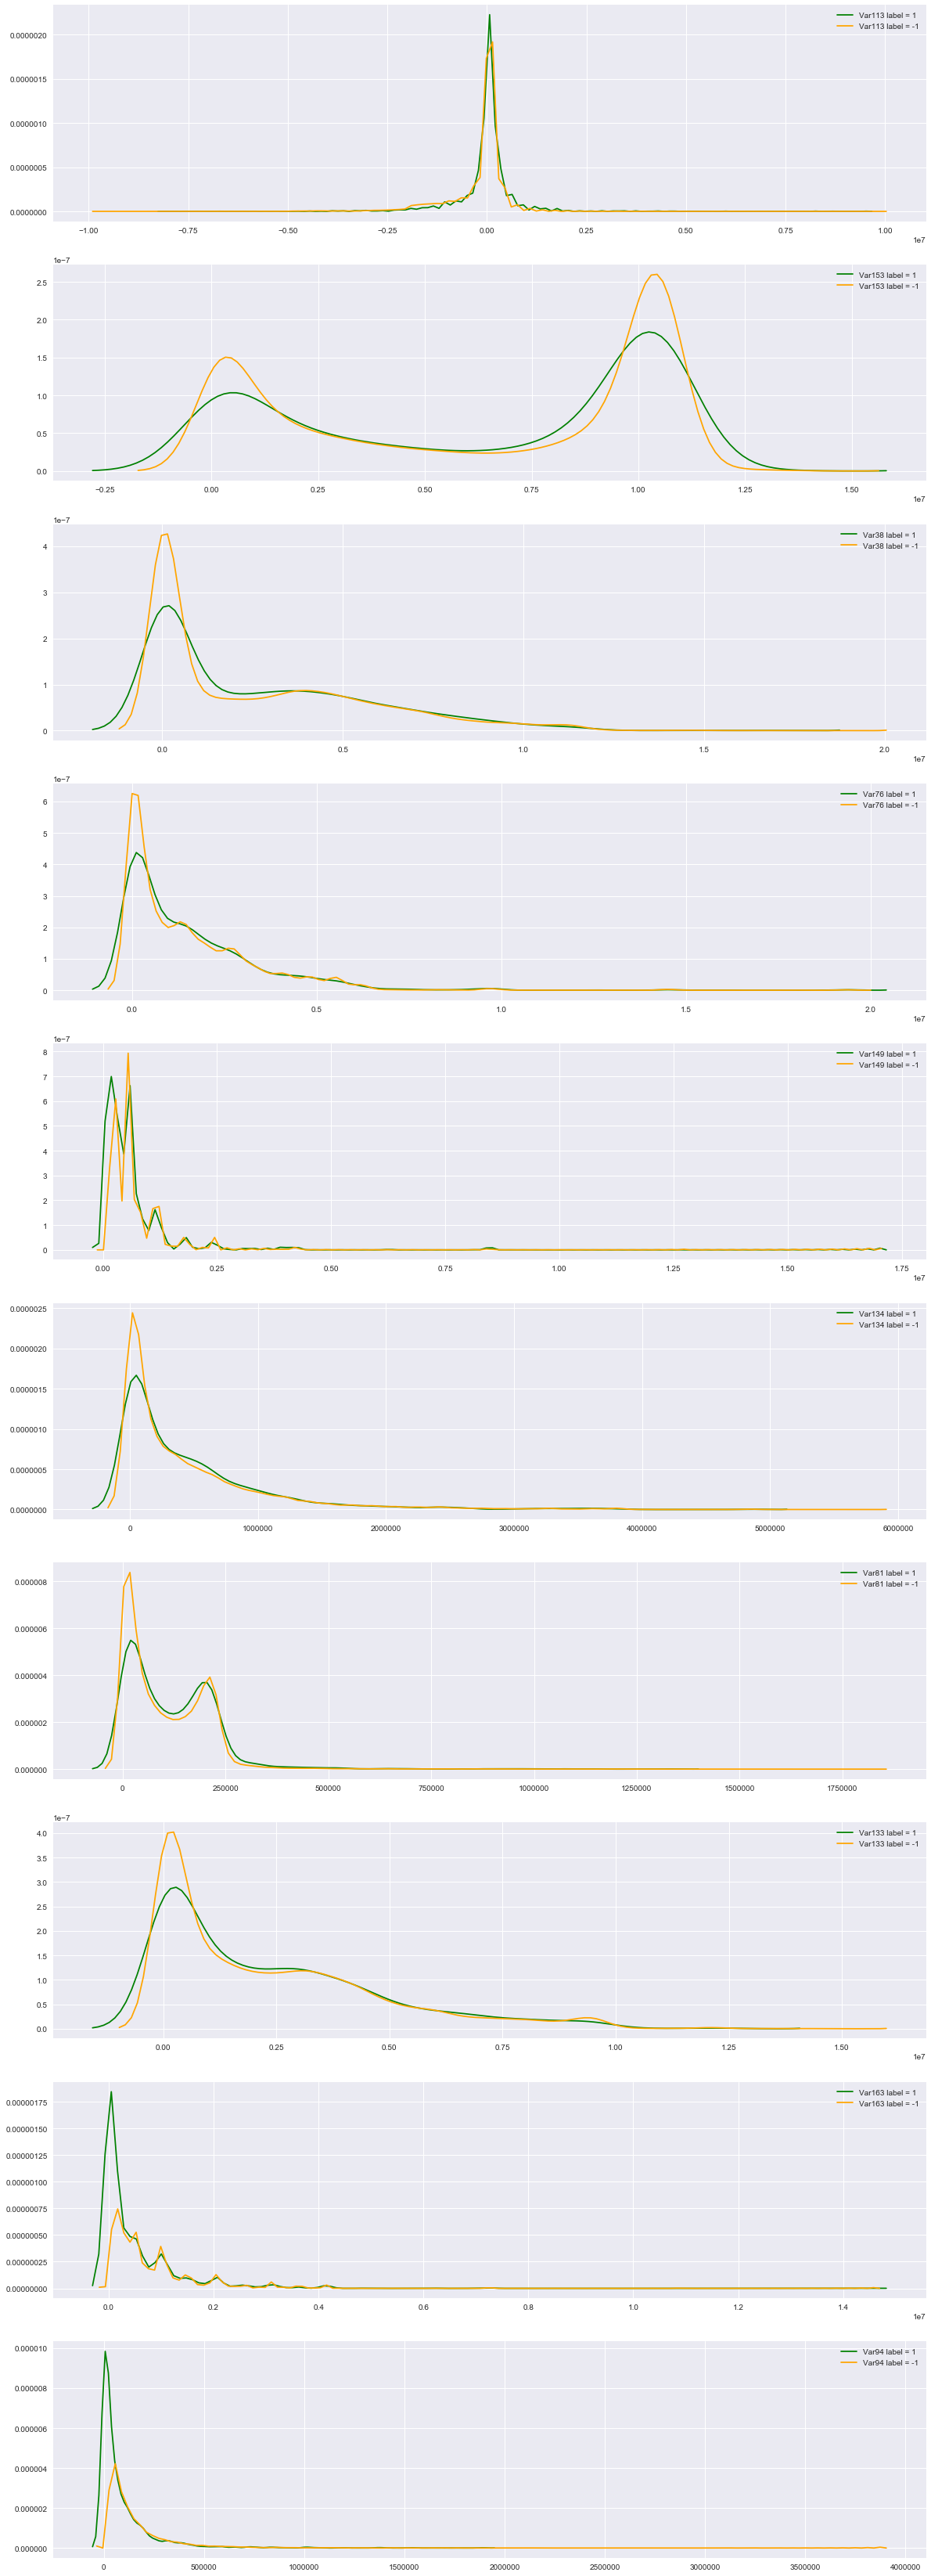

In [12]:
fig, axs = plt.subplots(10, figsize = (20,60))
sns.set(color_codes=True)
for ax, column in zip(axs, columns):
    sns.kdeplot(numeric_data[column][numeric_data['labels'] == 1], ax = ax, color = "green", label = str(column)+" label = 1")
    sns.kdeplot(numeric_data[column][numeric_data['labels'] == -1], ax = ax, color = "orange", label = str(column)+" label = -1")

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [13]:
np.random.RandomState(42)
random_features = np.random.randint(40, size = 10)
columns = correlations.iloc[random_features, 0]
columns[len(columns)] = ("labels")

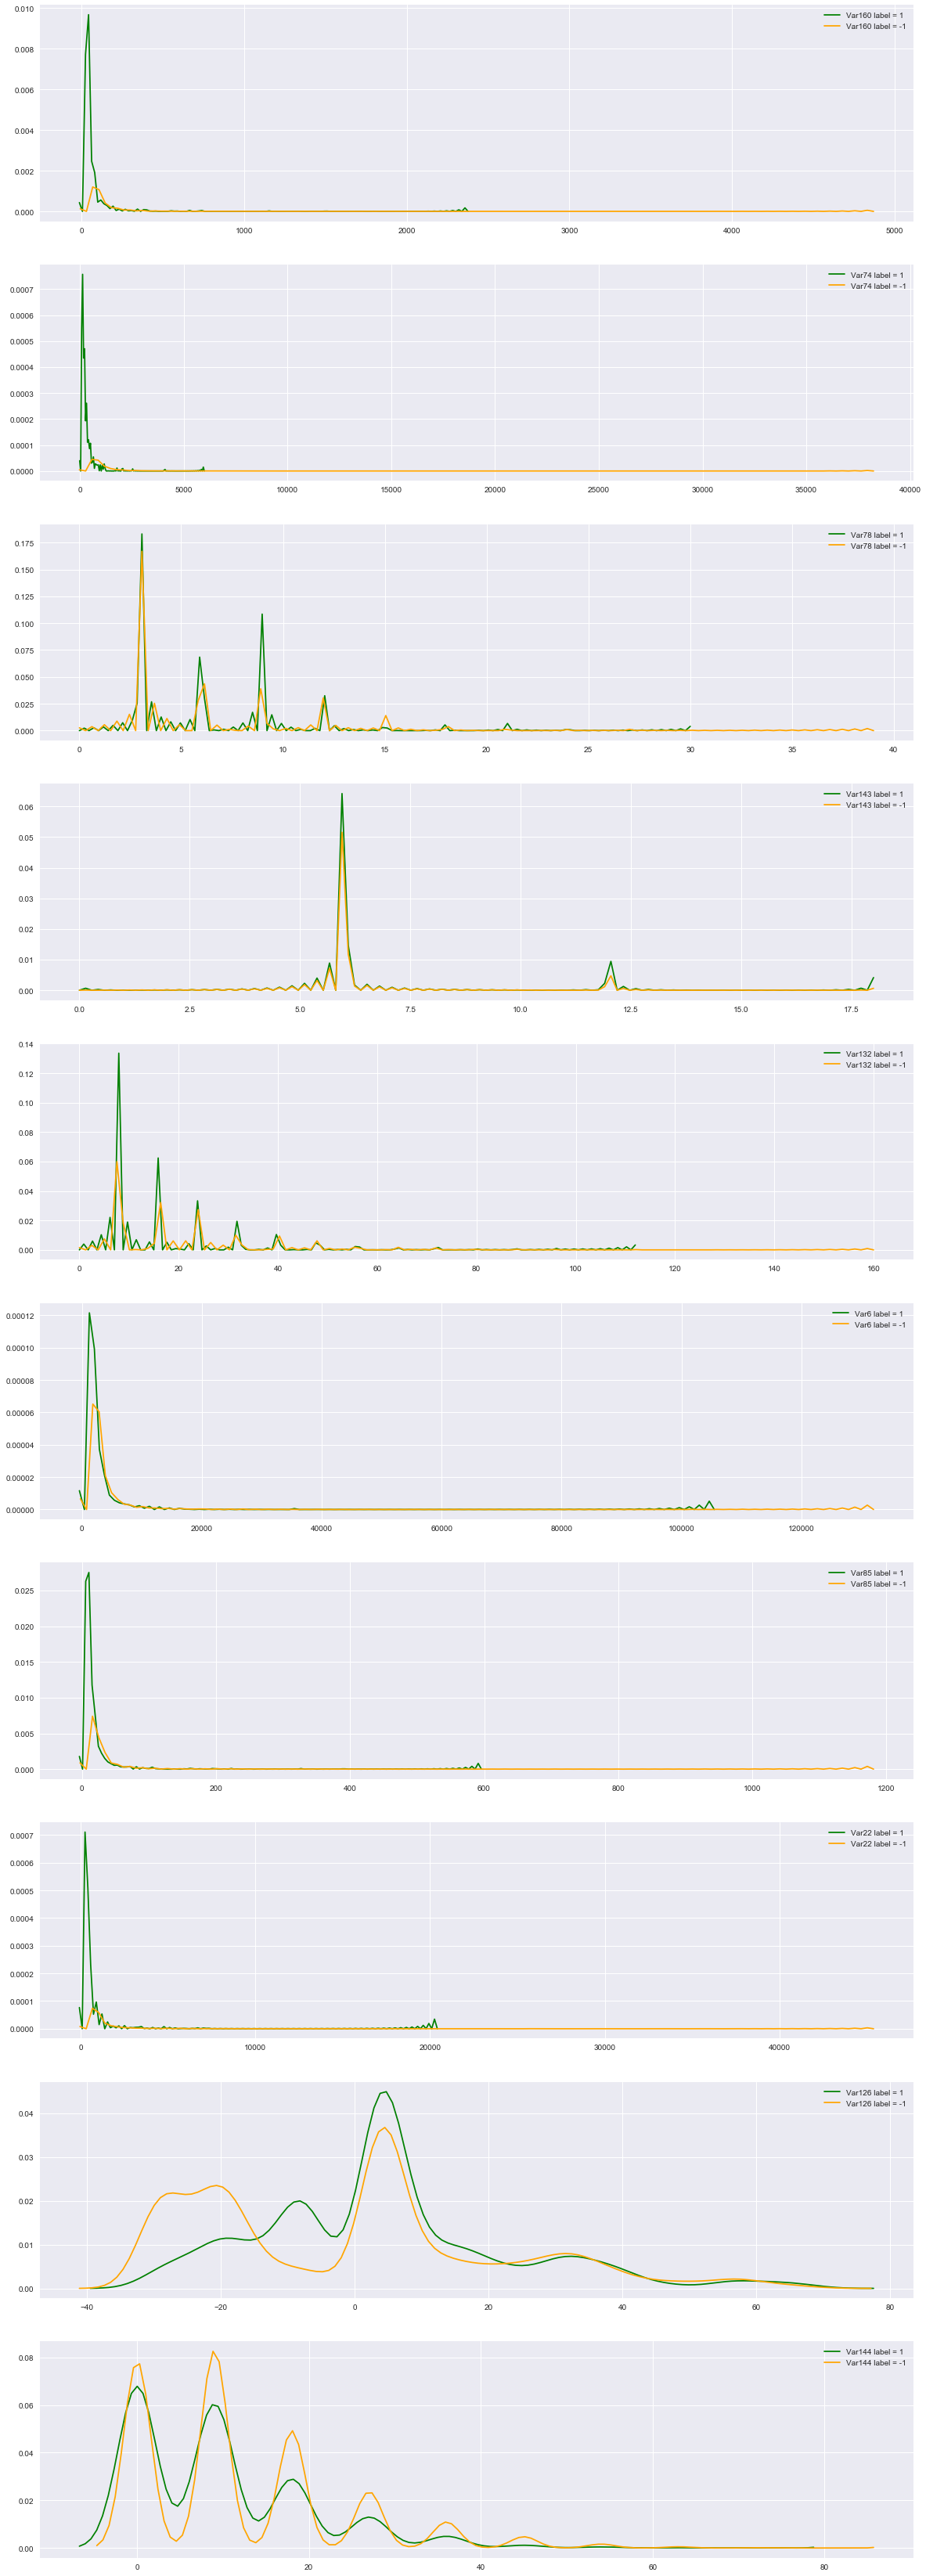

In [14]:
fig, axs = plt.subplots(10, figsize = (20,60))
sns.set(color_codes=True)
for ax, column in zip(axs, columns):
    sns.kdeplot(numeric_data[column][numeric_data['labels'] == 1], ax = ax, color = "green", label = str(column)+" label = 1")
    sns.kdeplot(numeric_data[column][numeric_data['labels'] == -1], ax = ax, color = "orange", label = str(column)+" label = -1")


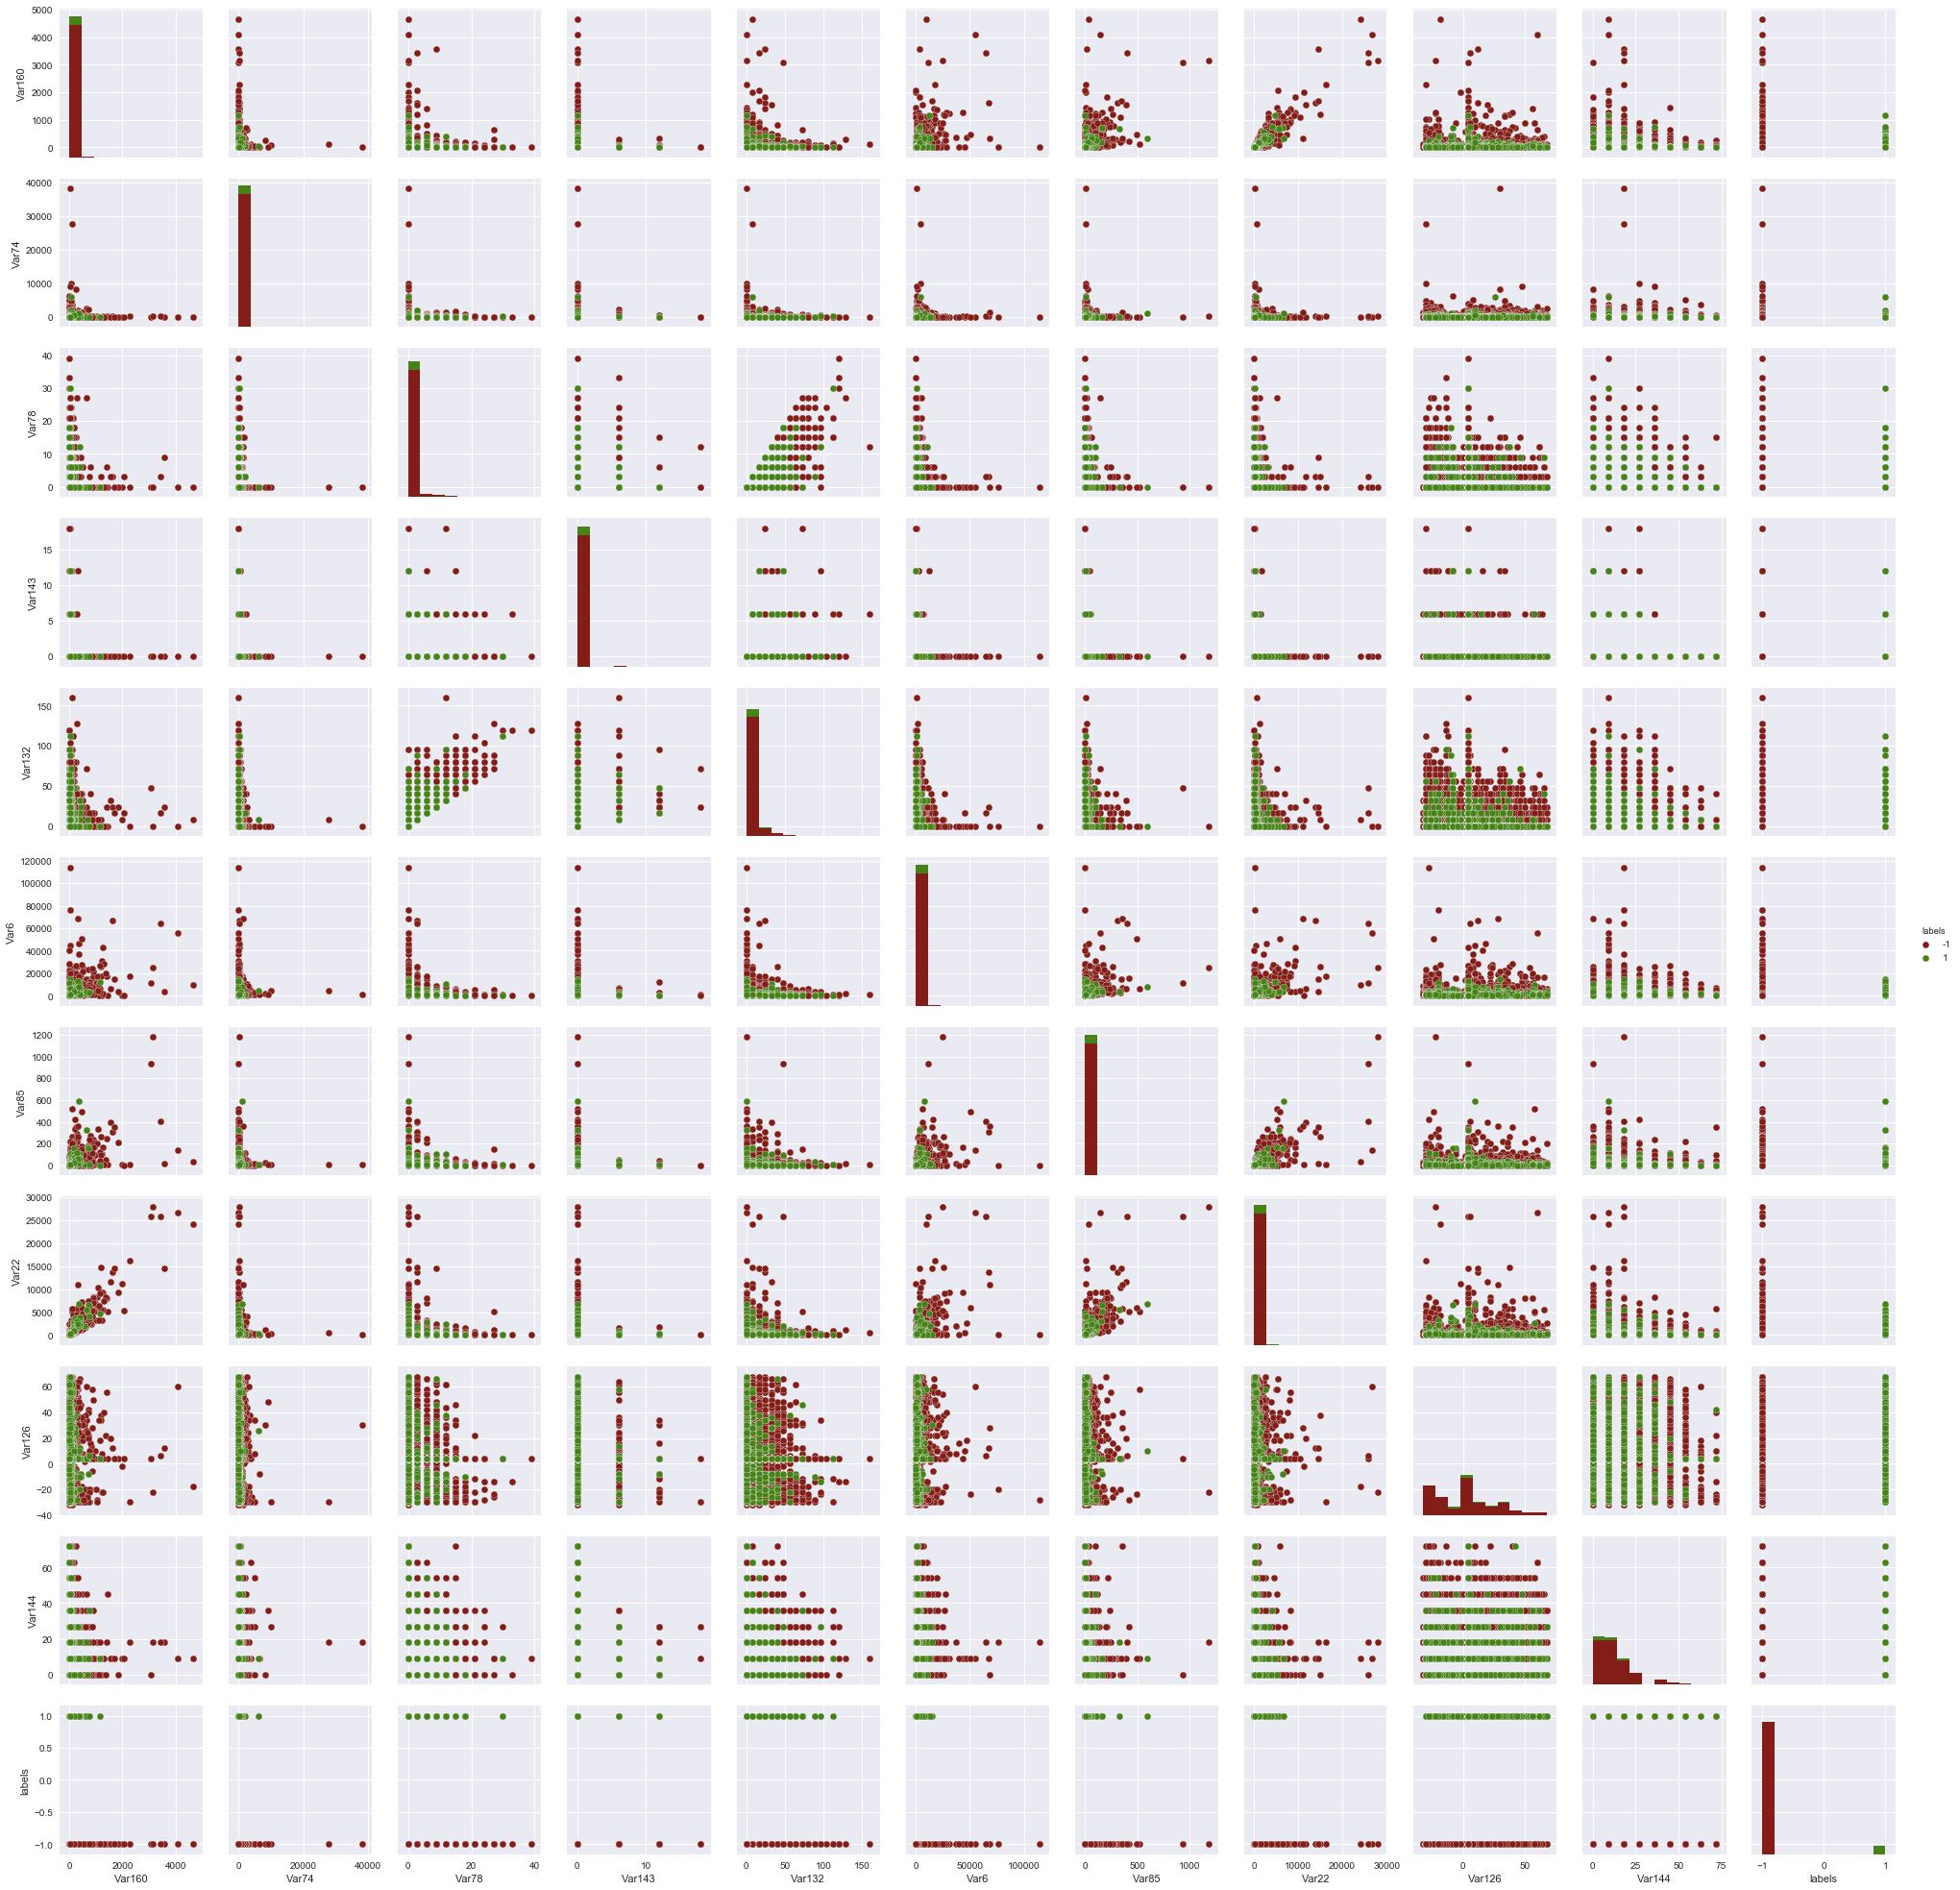

In [15]:
sns_plot = sns.pairplot(numeric_data[columns].dropna(), hue="labels",palette = sns.hls_palette(4, l=.3, s=.7))

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

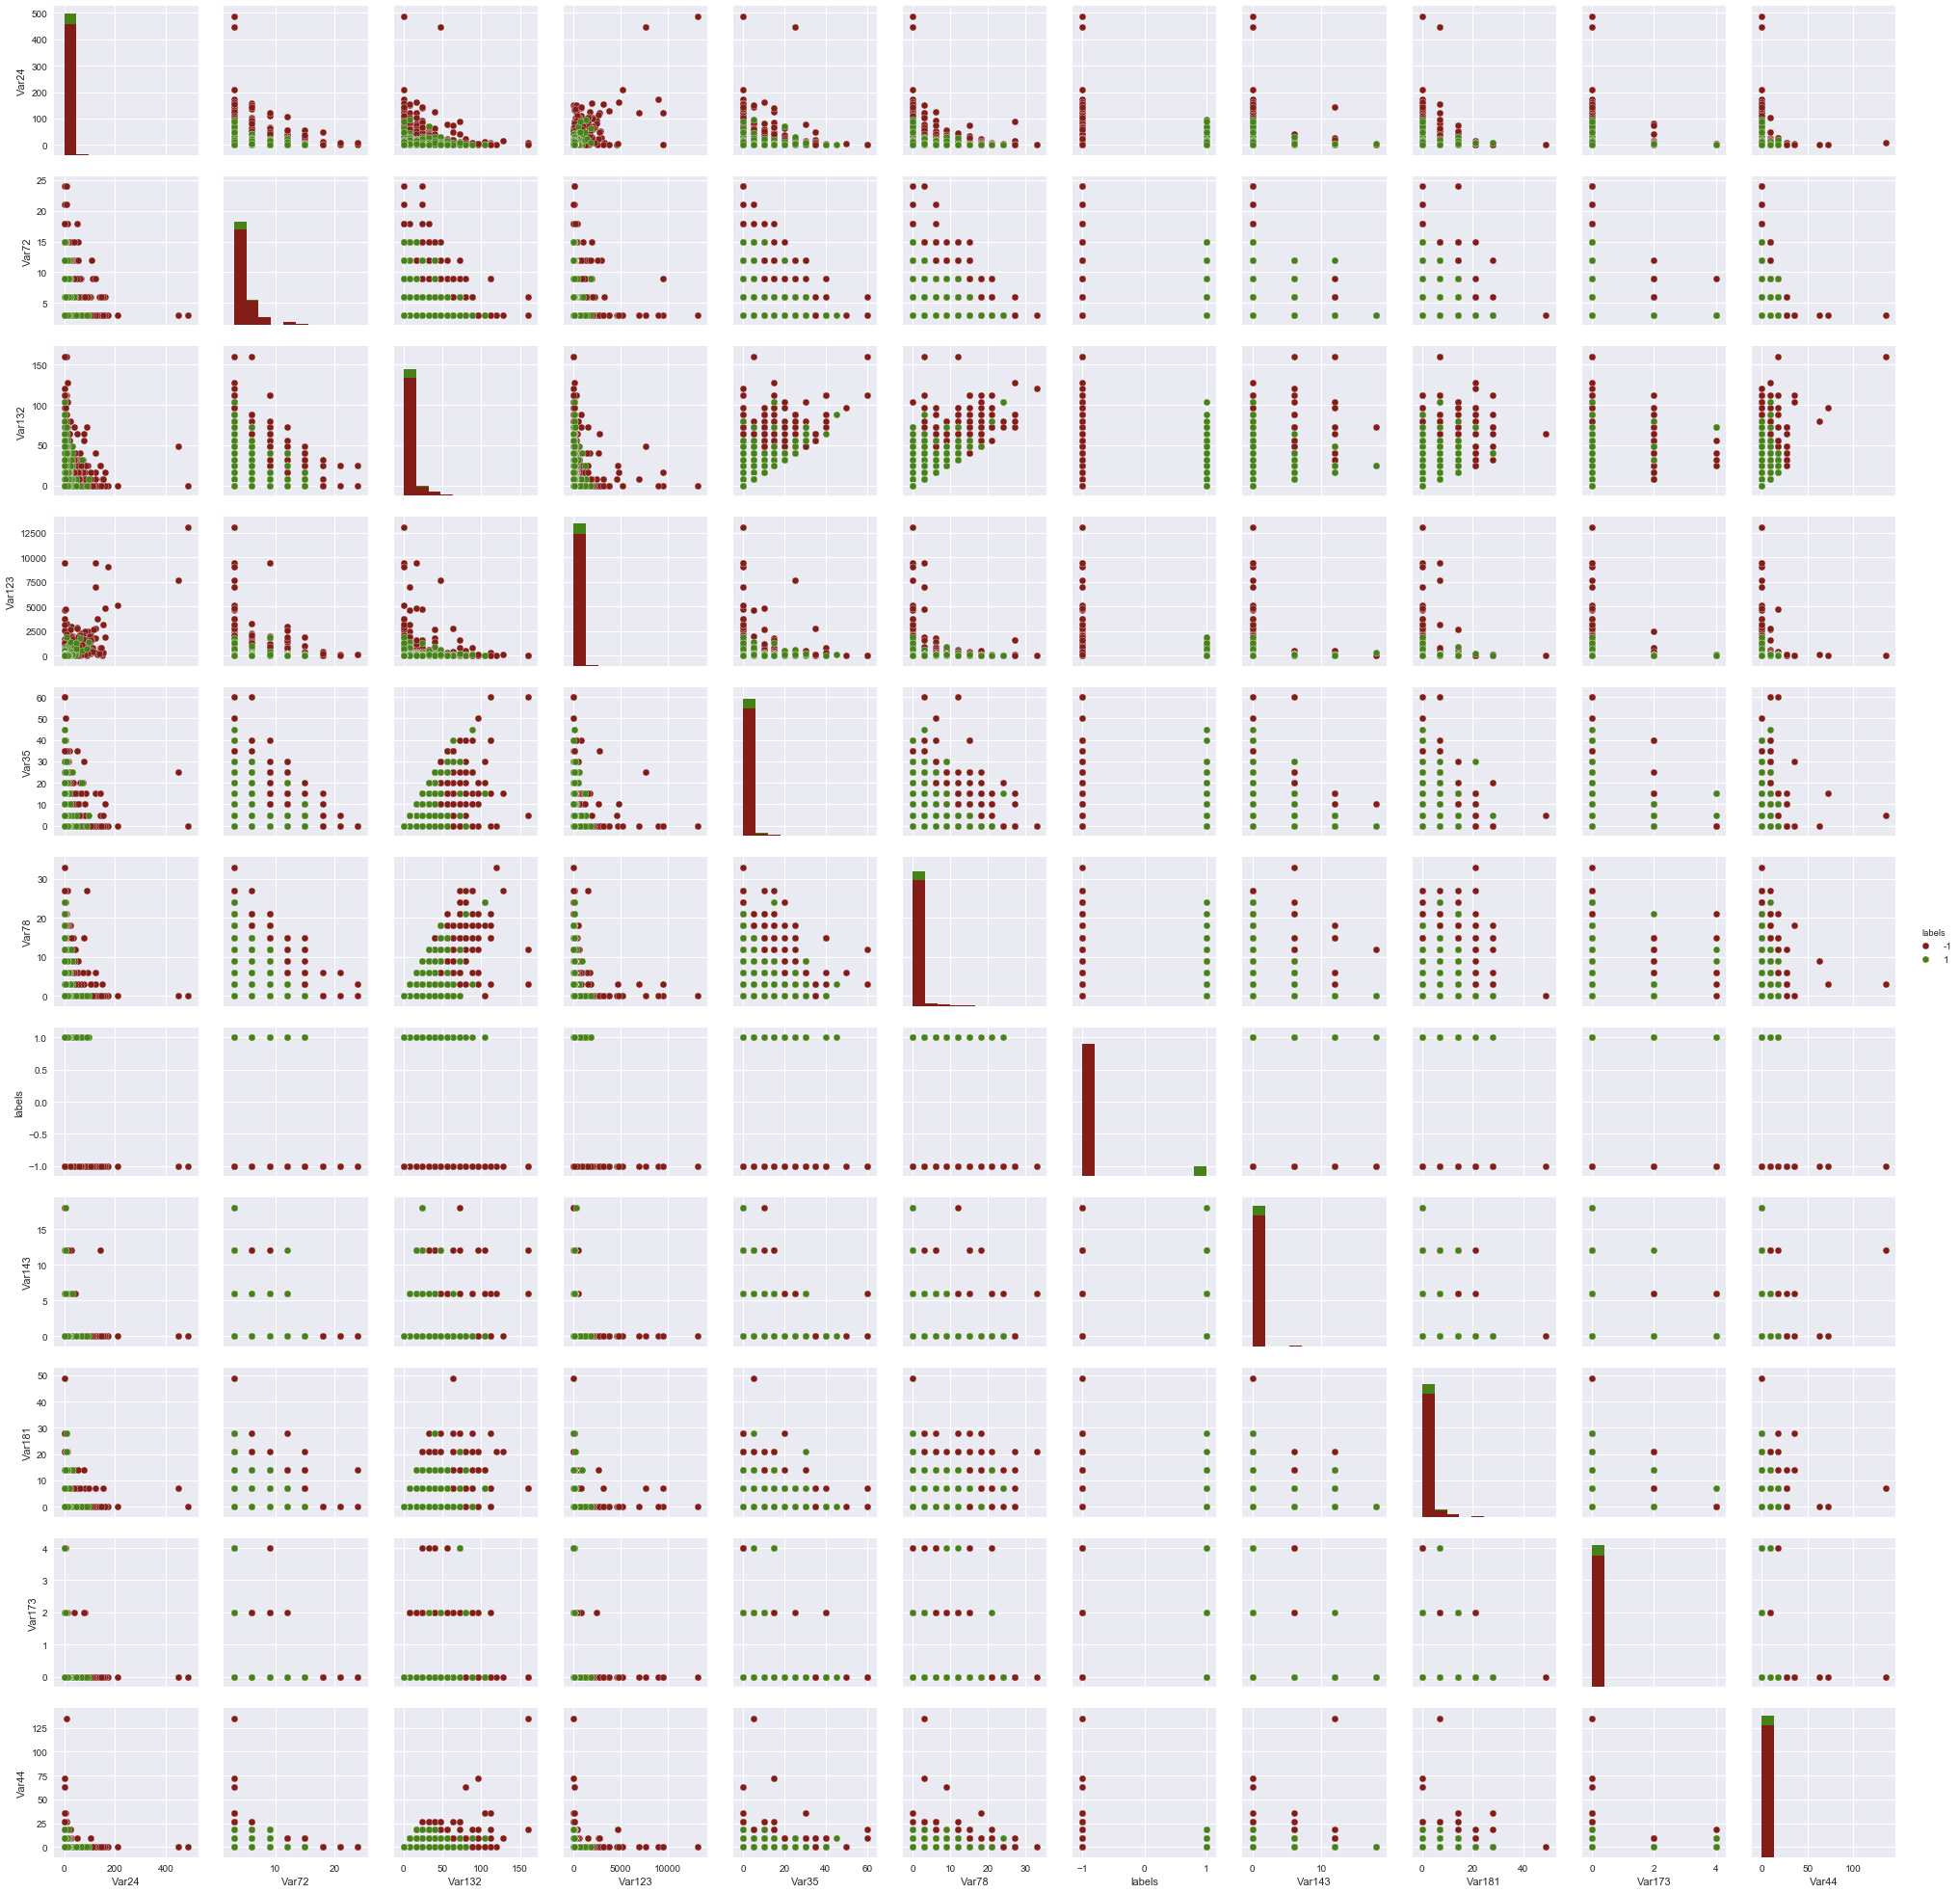

In [16]:
columns = correlations.feature.iloc[len(correlations)-11:]
columns[len(columns)] = ("labels")
sns_plot = sns.pairplot(numeric_data[columns].dropna(), hue="labels",palette = sns.hls_palette(4, l=.3, s=.7))

C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


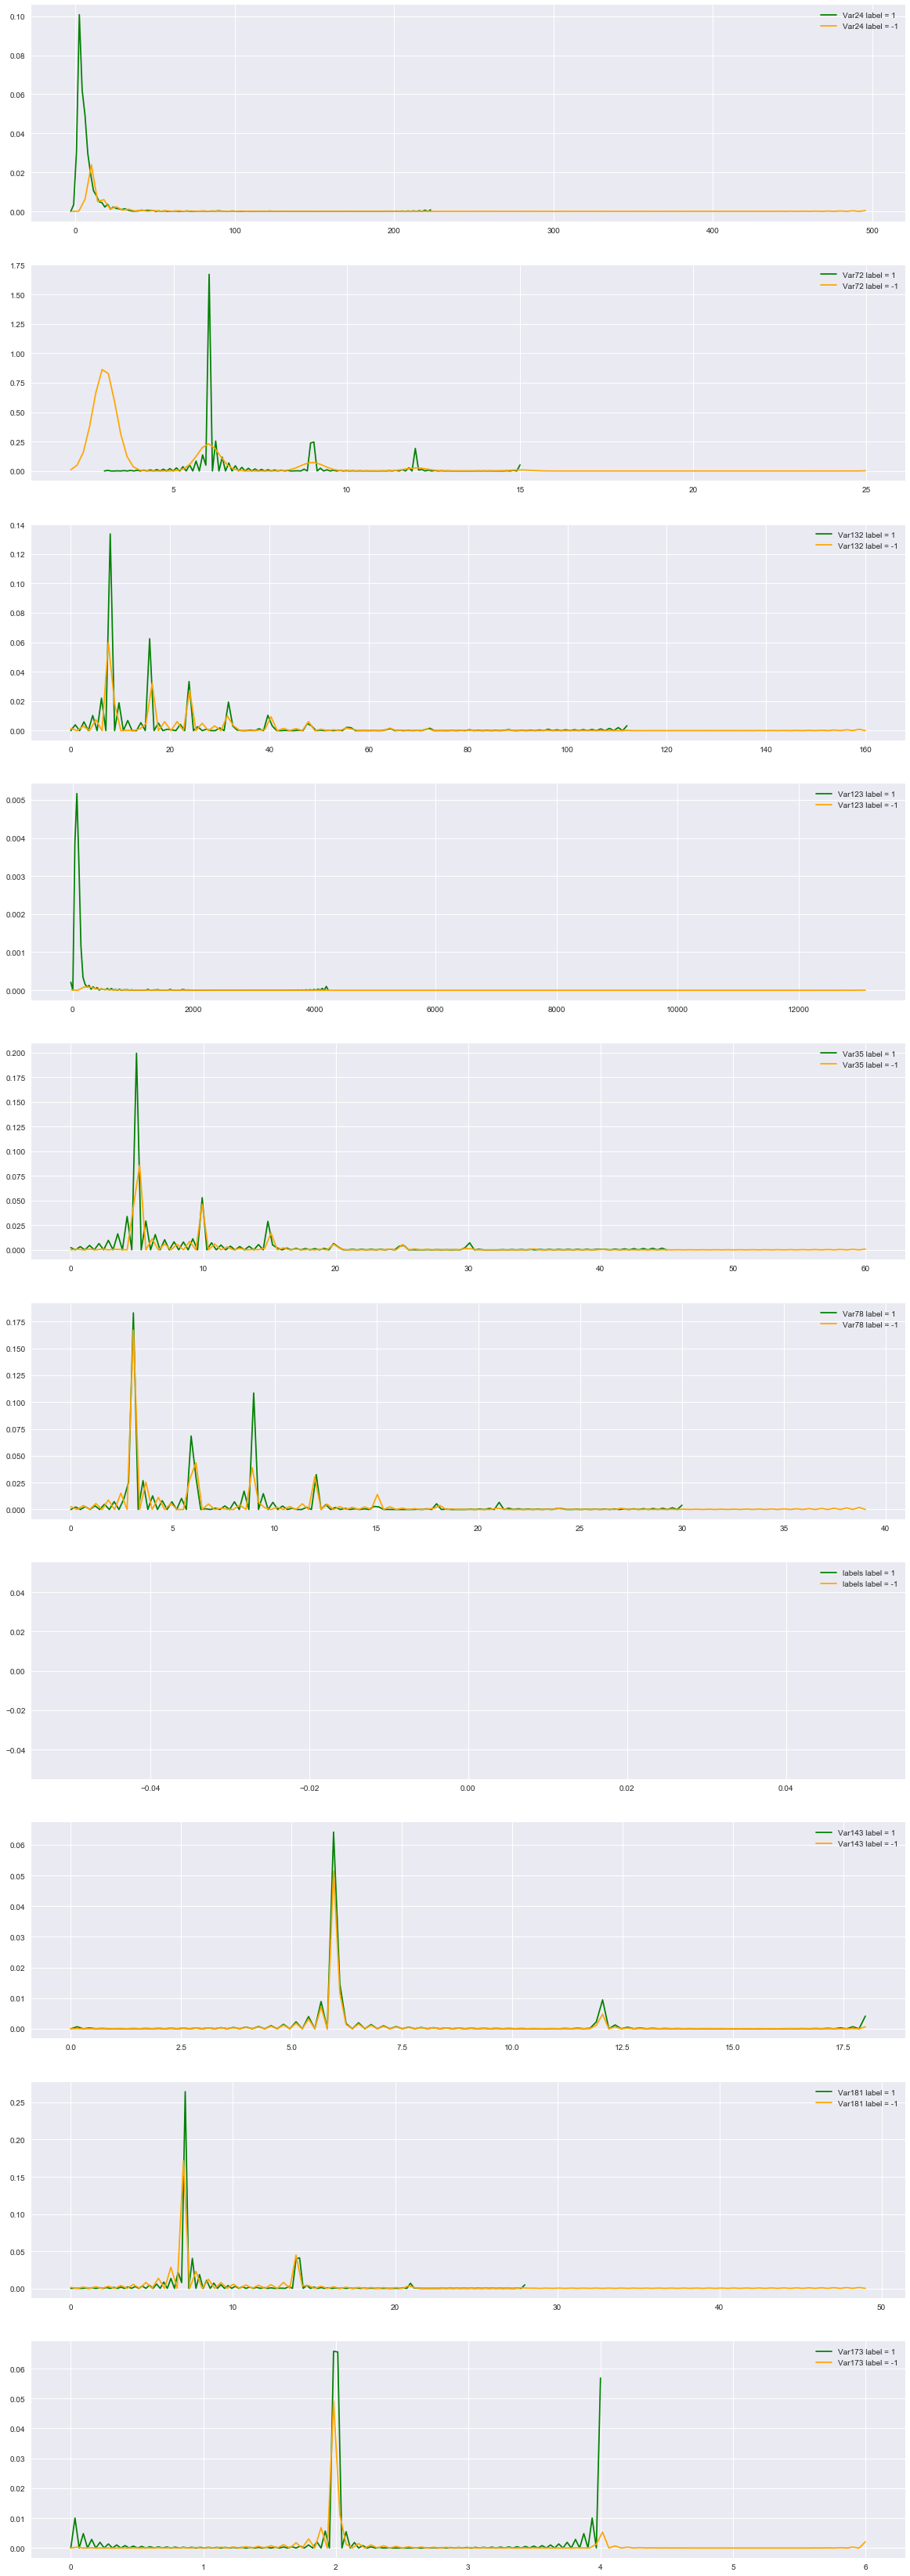

In [17]:
fig, axs = plt.subplots(10, figsize = (20,60))
sns.set(color_codes=True)
for ax, column in zip(axs, columns):
    sns.kdeplot(numeric_data[column][numeric_data['labels'] == 1], ax = ax, color = "green", label = str(column)+" label = 1")
    sns.kdeplot(numeric_data[column][numeric_data['labels'] == -1], ax = ax, color = "orange", label = str(column)+" label = -1")

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

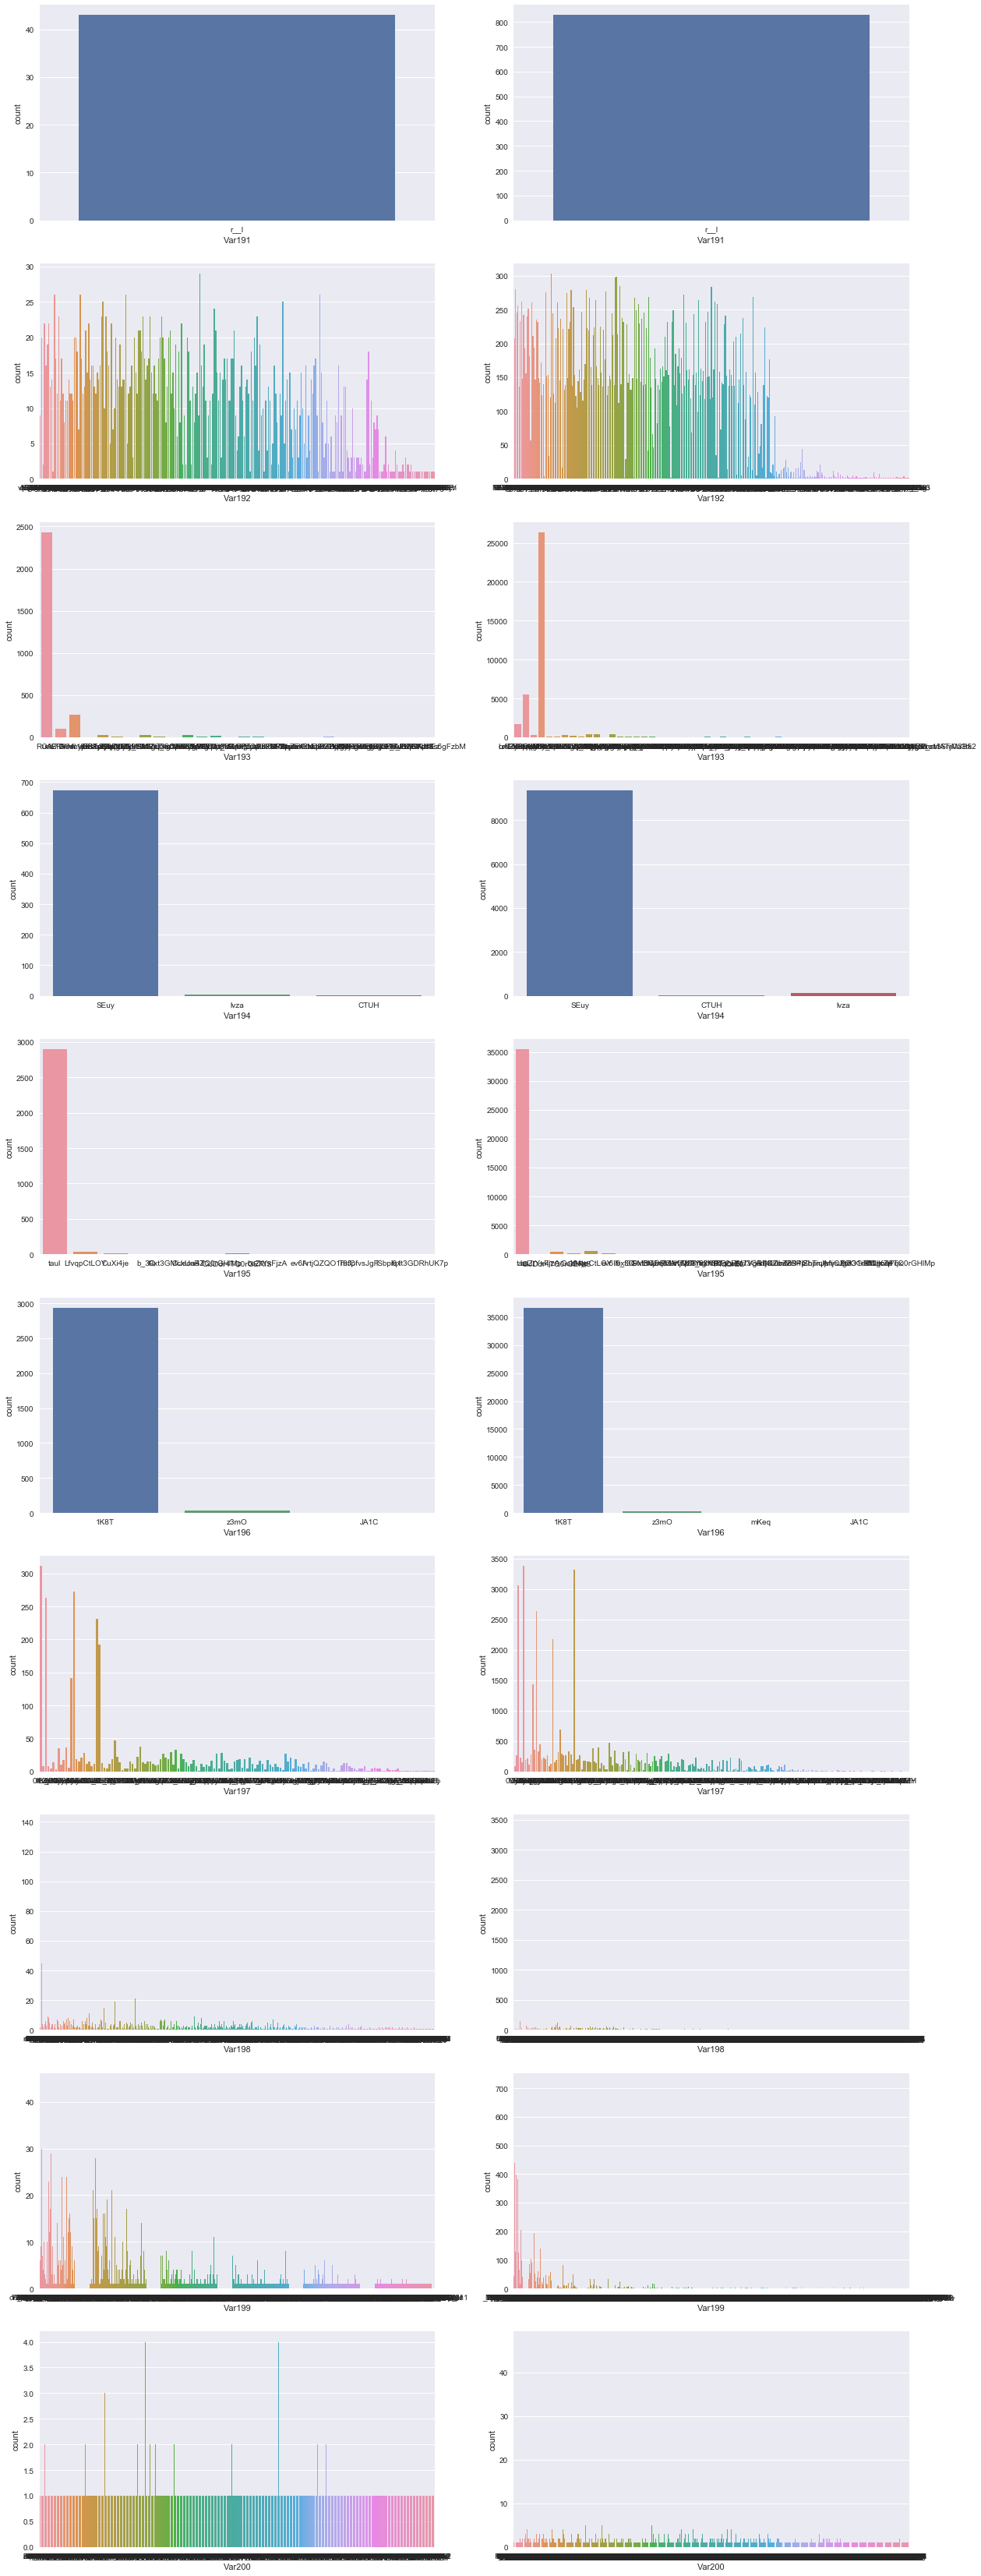

In [28]:
fig, axs = plt.subplots(10,2, figsize = (20,60))
for y in range(10):
    sns.countplot(categorical_data.iloc[:, y][categorical_data['labels'] == 1], ax = axs[y,0])
    sns.countplot(categorical_data.iloc[:, y][categorical_data['labels'] == -1], ax = axs[y,1])

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

* Большенство признаков, скорее всего, не будут информативными, т.к. имеют очень много пропусков. В большинстве числовых признаков, в которых мало пропусков, видны четкие различия в распредилении плотности по целевой переменной, это дает основание пологать, что признаки будут полезными для моделей. Некоторые числовые признаки похожи на категориальные, т.к. уникальных значений в них мало.
* Наибольший вклад в модель окажут большинство числовых переменных, в которых число пропусков в каждом из классов будет минимальным(<200). Например Var160, Var74, Var85, Var73 и некоторые категориальные(например Var193).
* Наимение полезными будут все числовые переменные, в которых большое число пропусков, и большинство категориальных признаков.
* Отбор признаков будет полезен для построения моделей.